In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
df=pd.read_csv(r"C:\Users\AnnamalaiG\OneDrive\Desktop\Coures 9\DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv")

In [11]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [19]:
df.columns

Index(['ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours'], dtype='object')

In [27]:
# Task 1
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.describe())

  ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours
0  11;26;7;3;1;289;36;13;33;239.554;97;0;1;2;1;0;...                                                                                                                                                                                                                                                  
1  36;0;7;3;1;118;13;18;50;239.554;97;1;1;1;1;0;0...                                                                                                                                                                                                                                                  
2  3;23;7;4;1;179;51;18;38;239.554;97;0;1;0;1;0;0...                                                               

In [39]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
df_numeric = df.drop(columns=non_numeric_columns)
df_numeric.fillna(df_numeric.mean(), inplace=True)
print("Updated DataFrame with missing values filled:")
print(df_numeric.head())

Updated DataFrame with missing values filled:
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  left  promotion_last_5years  
0                   3              0     1                      0  
1                   6              0     1                      0  
2                   4              0     1                      0  
3                   5              0     1                      0  
4                   3              0     1                      0  


In [45]:
print("Number of columns in the DataFrame:", len(df.columns))
print("Columns in the DataFrame:", df.columns)

new_column_names = [
    'ID', 'Reason_for_Absence', 'Month_of_Absence', 'Day_of_Week', 'Seasons', 
    'Transportation_Expense', 'Distance_from_Residence_to_Work', 'Service_Time',
    'Age', 'Workload_Avg_per_Day', 'Hit_Target', 'Disciplinary_Failure', 
    'Education', 'Son', 'Social_Drinker', 'Social_Smoker', 'Pet', 
    'Weight', 'Height', 'Body_Mass_Index', 'Absenteeism_Time_in_Hours'
]

if len(df.columns) == len(new_column_names):
    df.columns = new_column_names
else:
    print(f"Length mismatch: DataFrame has {len(df.columns)} columns, but {len(new_column_names)} new names provided.")


Number of columns in the DataFrame: 10
Columns in the DataFrame: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')
Length mismatch: DataFrame has 10 columns, but 21 new names provided.


In [49]:
# Remove duplicates 
df.drop_duplicates(inplace=True) 
print("DataFrame after cleaning:") 
print(df.head())

DataFrame after cleaning:
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   sal

In [53]:
print(df.dtypes)
numeric_columns = df.select_dtypes(include=['number'])
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object


In [65]:
if len(df.columns) == len(new_column_names):
    df.columns = new_column_names
else:
    print(f"Length mismatch: DataFrame has {len(df.columns)} columns, but {len(new_column_names)} new names provided.")
print("Columns in the DataFrame after renaming:", df.columns)
if 'Month_of_Absence' in df.columns:
    df['Month_of_Absence'] = df['Month_of_Absence'].astype('category')
if 'Day_of_Week' in df.columns:
    df['Day_of_Week'] = df['Day_of_Week'].astype('category')


Length mismatch: DataFrame has 10 columns, but 21 new names provided.
Columns in the DataFrame after renaming: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [69]:
# Task 2
print(df.info())
print(df.describe())
df = df.fillna(0)
demographic_factors = ['Age', 'Education', 'Son', 'Reason for absence']
work_factors = ['Disciplinary failure', 'Hit target']
for factor in demographic_factors:
    print(f"Mean absenteeism time based on {factor}:")
    print(df.groupby(factor)['Absenteeism time in hours'].mean())
    print("\n")
for factor in work_factors:
    print(f"Mean absenteeism time based on {factor}:")
    print(df.groupby(factor)['Absenteeism time in hours'].mean())
    print("\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

Frequency of Reasons for Absence:
Reason for absence
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: count, dtype: int64


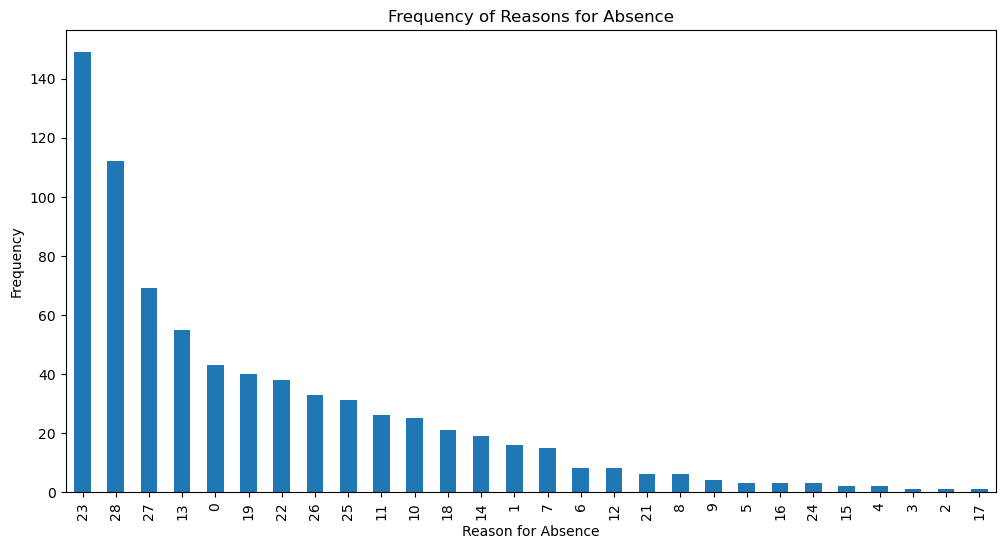

In [79]:
# Task 3
df = df.fillna(0)
reason_counts = df['Reason for absence'].value_counts()
print("Frequency of Reasons for Absence:")
print(reason_counts)
plt.figure(figsize=(12, 6))
reason_counts.plot(kind='bar')
plt.title('Frequency of Reasons for Absence')
plt.xlabel('Reason for Absence')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Reasons for Absence by Month:
Reason for absence   0    1    2    3    4    5    6    7    8    9   ...  \
Month of absence                                                      ...   
0                   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1                   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2                   0.0  3.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  ...   
3                   4.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  ...   
4                   1.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  ...   
5                   6.0  1.0  0.0  0.0  0.0  1.0  1.0  2.0  2.0  0.0  ...   
6                   3.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  ...   
7                   2.0  5.0  0.0  0.0  0.0  1.0  2.0  2.0  0.0  1.0  ...   
8                   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...   
9                   9.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  2.0  ...   
10                  9.0  4.0  0.0  0.0  1.0  0

<Figure size 1400x800 with 0 Axes>

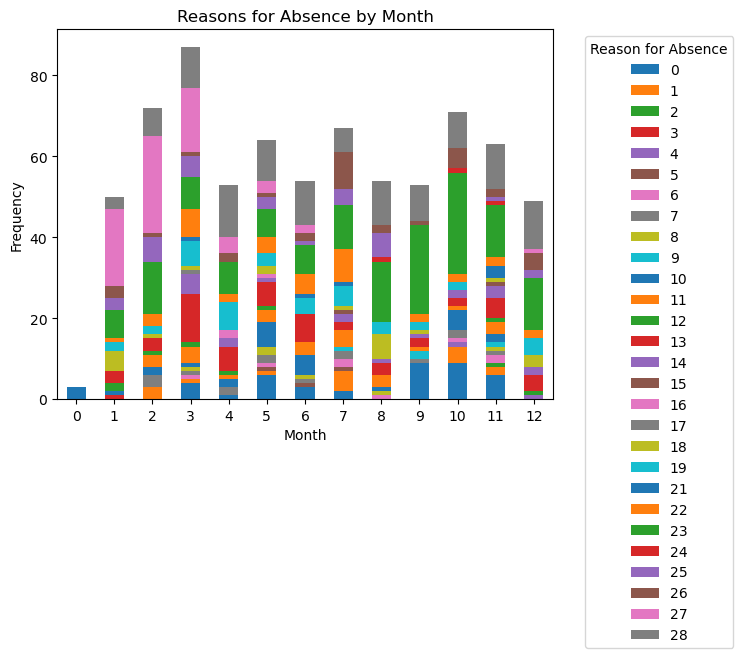

In [75]:
monthly_reason_counts = df.groupby('Month of absence')['Reason for absence'].value_counts().unstack().fillna(0)
print("Reasons for Absence by Month:")
print(monthly_reason_counts)
plt.figure(figsize=(14, 8))
monthly_reason_counts.plot(kind='bar', stacked=True)
plt.title('Reasons for Absence by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Reason for Absence', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [17]:
# Task 4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



df = df.fillna(0)
df = pd.get_dummies(df, columns=['Reason for absence'], drop_first=True)
print("Columns after getting dummies:")
print(df.columns)

features = ['Disciplinary failure', 'Distance from Residence to Work', 'Body mass index'] + [col for col in df.columns if 'Reason for absence' in col]
target = 'Absenteeism time in hours'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print("Sample Predictions:")
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head())


Columns after getting dummies:
Index(['ID', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Reason for absence_1',
       'Reason for absence_2', 'Reason for absence_3', 'Reason for absence_4',
       'Reason for absence_5', 'Reason for absence_6', 'Reason for absence_7',
       'Reason for absence_8', 'Reason for absence_9', 'Reason for absence_10',
       'Reason for absence_11', 'Reason for absence_12',
       'Reason for absence_13', 'Reason for absence_14',
       'Reason for absence_15', 'Reason for absence_16',
       'Reason for absence_17', 'Reason for absence_18',
       'Reason for absence_19', 'Reason for absence_21',
       'Reason for absence_22', 'Reason for ab